In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [349]:
#TODO
train = pd.read_csv("data/prostate_train.csv")
test = pd.read_csv("data/prostate_test.csv")

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [350]:
#TODO
Xtrain, ytrain = train.drop('lpsa', axis=1), train['lpsa']
Xtest, ytest = test.drop('lpsa', axis=1), test['lpsa']

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

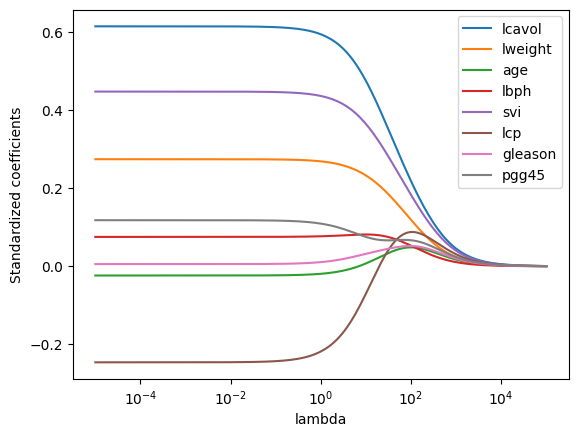

In [351]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

cols = Xtrain.columns
# Here we standardize the data to satisfy the Ridge and Lasso prerequisite
Xtrain = StandardScaler().fit_transform(Xtrain)

res = []
#TODO
for i in lambdas:
    rm = Ridge(alpha=i)
    rm.fit(Xtrain, ytrain)
    res.append(rm.coef_)

plt.xscale(value="log")
plt.xlabel("lambda")
plt.ylabel("Standardized coefficients")
for i, name in enumerate(cols):
    r = []
    for j in res:
        r.append(j[i])
    plt.plot(lambdas, r, label=name)
plt.legend()

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [352]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statistics

# K-fold cross validation
folds = 10

#TODO
kf = KFold(n_splits=folds)
trainmse={}
testmse={}
for i in lambdas:
    testmse[i]=[]
    trainmse[i]=[]

for i, (itrain, itest) in enumerate(kf.split(Xtrain)):
    for l in lambdas:
        rm = Ridge(alpha=l)
        rm.fit(Xtrain[itrain], ytrain[itrain])
        testmse[l].append(mean_squared_error(ytrain[itest], rm.predict(Xtrain[itest])))
        trainmse[l].append(mean_squared_error(ytrain[itrain], rm.predict(Xtrain[itrain])))

final = {}
for k in testmse.keys():
    final[k] = statistics.mean(testmse[k])

final2 = {}
for k in testmse.keys():
    final2[k] = statistics.mean(trainmse[k])

Report train and test error measured in MSE for this $\lambda$.

In [353]:
i = min(final, key=final.get)
print("Best lambda for Ridge after validation is", i)
print("Validation MSE is", final[i])
print("Train MSE is", final2[i])

Best lambda for Ridge after validation is 3.7834626171319328
Validation MSE is 0.7553082801639018
Train MSE is 0.46590830346054113


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

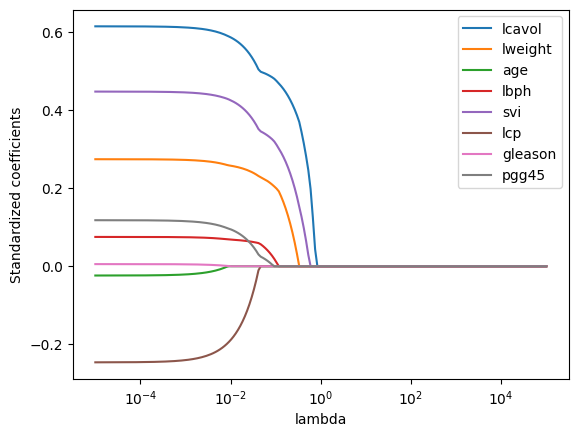

In [354]:
from sklearn.linear_model import Lasso

res=[]
for i in lambdas:
    rm = Lasso(alpha=i)
    rm.fit(Xtrain, ytrain)
    res.append(rm.coef_)

plt.xscale(value="log")
plt.xlabel("lambda")
plt.ylabel("Standardized coefficients")
for i, name in enumerate(cols):
    r = []
    for j in res:
        r.append(j[i])
    plt.plot(lambdas, r, label=name)
plt.legend()

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [355]:
kf = KFold(n_splits=folds)
trainmse2={}
testmse2={}
for i in lambdas:
    testmse2[i]=[]
    trainmse2[i]=[]

for i, (itrain, itest) in enumerate(kf.split(Xtrain)):
    for l in lambdas:
        rm = Lasso(alpha=l)
        rm.fit(Xtrain[itrain], ytrain[itrain])
        testmse2[l].append(mean_squared_error(ytrain[itest], rm.predict(Xtrain[itest])))
        trainmse2[l].append(mean_squared_error(ytrain[itrain], rm.predict(Xtrain[itrain])))

final3 = {}
for k in testmse.keys():
    final3[k] = statistics.mean(testmse2[k])

final4 = {}
for k in testmse.keys():
    final4[k] = statistics.mean(trainmse2[k])

In [356]:
i2 = min(final3, key=final3.get)
print("Best lambda for Lasso after validation is", i2)
print("Validation MSE is", final3[i2])
print("Train MSE is", final4[i2])

Best lambda for Lasso after validation is 0.018464249428955443
Validation MSE is 0.7488404144793981
Train MSE is 0.46686506024274305


In [357]:
print(cols)
rm = Lasso(alpha=i2)
rm.fit(Xtrain, ytrain)
print(rm.coef_)

rm2=Ridge(alpha=i)
rm2.fit(Xtrain, ytrain)
print(rm2.coef_)

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], dtype='object')
[ 0.56428922  0.25047386 -0.          0.06586641  0.40532414 -0.14106328
  0.          0.07737536]
[ 0.48471783  0.23586166  0.00493307  0.08135597  0.37081016 -0.08117229
  0.03048718  0.07690179]


How many and which features are used?
Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

We have used 6 out of 8 features.
'lcavol', 'lweight', 'lbph', 'svi', 'lcp' and 'pgg45' only were used
Whereas, in Ridge regression all 8 features were used
Non 0 coefficients in both methods are relatively close in value
except for 'lcp' where in Lasso it had double the value from its Ridge counterpart

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

In [358]:
print("Best Lasso MSE on test set is", mean_squared_error(ytest, rm.predict(StandardScaler().fit_transform(Xtest))))
print("Best Ridge MSE on test set is", mean_squared_error(ytest, rm2.predict(StandardScaler().fit_transform(Xtest))))

Best Lasso MSE on test set is 0.4802283553545272
Best Ridge MSE on test set is 0.4708257573728952


The MSE on test for the best Lasso and Ridge are ~0.48 and ~0.47 respectively.
So we would recommend using Lasso as it got a vry similar score to Ridge but used less predictors